<a href="https://colab.research.google.com/github/YoonHyeJu/project1/blob/master/leo_jag_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
path = '/content/gdrive/My Drive/Colab Notebooks/original_jag_leo/'

In [ ]:
# jag_dir = path + 'jaguar/'
# leo_dir = path + 'leopard/'

train_dir = path + 'train/'
validation_dir = path + 'validation/'
test_dir = path + 'test/'

In [ ]:
train_jag_dir = train_dir + 'train_jag/'
train_leo_dir = train_dir + 'train_leo/'

test_jag_dir = test_dir + 'test_jag/'
test_leo_dir = test_dir + 'test_leo/'

validation_jag_dir = validation_dir + 'validation_jag/'
validation_leo_dir = validation_dir + 'validation_leo/'

In [ ]:
import os

In [ ]:
print(len(os.listdir(train_jag_dir)))
print(len(os.listdir(test_jag_dir)))
print(len(os.listdir(validation_jag_dir)))

print(len(os.listdir(train_leo_dir)))
print(len(os.listdir(test_leo_dir)))
print(len(os.listdir(validation_leo_dir)))

# train_size = len(os.listdir(train_dir))
# test_size = len(os.listdir(test_dir))
# validation_size = len(os.listdir(validation_dir))

train_jag_size = len(os.listdir(train_jag_dir))
test_jag_size = len(os.listdir(test_jag_dir))
validation_jag_size = len(os.listdir(validation_jag_dir))

train_leo_size = len(os.listdir(train_leo_dir))
test_leo_size = len(os.listdir(test_leo_dir))
validation_leo_size = len(os.listdir(validation_leo_dir))

160
70
70
160
70
70


In [ ]:
train_size, validation_size, test_size = 320, 140, 140

In [ ]:
img_width, img_height = 224, 224

In [ ]:
import os, random
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

In [ ]:
def show_pictures(PATH):
    random_img = random.choice(os.listdir(PATH))
    img_path = os.path.join(PATH, random_img)

    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_tensor = image.img_to_array(img)
    img_tensor = img_tensor/255.
    plt.imshow(img_tensor)
    plt.show()

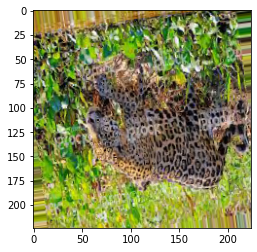

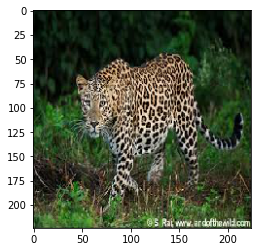

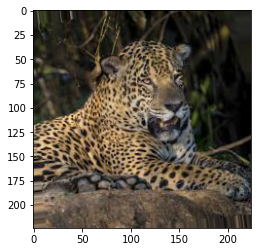

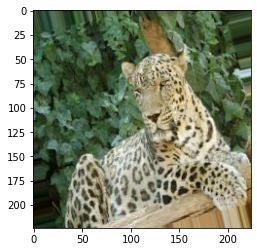

In [ ]:
for i in range(0,2):
    show_pictures(train_jag_dir)
    show_pictures(train_leo_dir)

In [ ]:
from keras.applications import ResNet50V2

In [ ]:
conv_base = ResNet50V2(weights = 'imagenet', include_top= False, input_shape=(img_width, img_height, 3)) # include_top: 상단의 레이어를 포함할 것인지 아닌지 결정하는 파라미터

94674944/94668760 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [ ]:
import os, shutil
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rescale=1/255.)
batch_size = 32

In [ ]:
def extract_features(directory, sample_count):
    features = np.zeros(shape = (sample_count,7,7,512))
    labels = np.zeros(shape=(sample_count))

    generator = datagen.flow_from_directory(directory, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')

    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i+1) * batch_size] = features_batch
        labels[i * batch_size : (i+1) * batch_size] = labels_batch
        i+=1
        if i*batch_size >= sample_count:
            break
    return features, labels

In [ ]:
train_features, train_labels = extract_features(train_dir, train_size)
validation_features, validation_labels = extract_features(validation_dir, validation_size)
test_features, test_labels = extract_features(test_dir, test_size)

Found 320 images belonging to 2 classes.


ValueError: ignored

In [ ]:
print(train_features)
print(train_labels)

[[[[0.         0.         0.12724406 ... 0.         0.91799188
    0.        ]
   [0.24268791 0.         0.05135089 ... 0.         1.00055385
    0.        ]
   [0.93964702 0.         0.31016788 ... 0.         1.12094831
    0.        ]
   ...
   [0.64274031 0.         0.14773101 ... 0.         1.34160984
    0.        ]
   [0.50871313 0.         0.         ... 0.         0.96959144
    0.        ]
   [0.20558599 0.         0.         ... 0.         0.85161412
    0.        ]]

  [[0.         0.         0.52712542 ... 0.         1.1409862
    0.        ]
   [0.44045705 0.         0.44613773 ... 0.         1.35045421
    0.        ]
   [1.32595754 0.         0.44743228 ... 0.         0.98837984
    0.        ]
   ...
   [0.64819014 0.         0.6956684  ... 0.         1.27018857
    0.        ]
   [0.50643814 0.         1.18785286 ... 0.         1.0165143
    0.        ]
   [0.5326094  0.         0.55403382 ... 0.         0.78196889
    0.        ]]

  [[0.18900913 0.         0.41355968

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

In [ ]:
epochs = 100

In [ ]:

model = models.Sequential()
model.add(layers.GlobalAveragePooling2D(input_shape=(7,7,512)))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = optimizers.Adam(), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(train_features, train_labels,
                    epochs = epochs,
                    batch_size = batch_size,
                    validation_data = (validation_features, validation_labels))

Epoch 1/100
10/10 [==============================] - 0s 22ms/step - loss: 0.6842 - acc: 0.5719 - val_loss: 0.6738 - val_acc: 0.5857
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6703 - acc: 0.6062 - val_loss: 0.6656 - val_acc: 0.6429
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6596 - acc: 0.6812 - val_loss: 0.6560 - val_acc: 0.7000
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6499 - acc: 0.7250 - val_loss: 0.6471 - val_acc: 0.7286
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6404 - acc: 0.7344 - val_loss: 0.6385 - val_acc: 0.7357
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6315 - acc: 0.7531 - val_loss: 0.6301 - val_acc: 0.7643
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6242 - acc: 0.7750 - val_loss: 0.6230 - val_acc: 0.7286
Epoch 8/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6150 - 

In [ ]:
def visualize_predictoins(classifier, n_cases):
    for i in range(0,n_cases):
        path = random.choice([test_jag_dir, test_leo_dir])

        random_img = random.choice(os.listdir(path))
        img_path = os.path.join(path, random_img)
        img = image.load_img(img_path, target_size=(img_width, img_height))
        img_tensor = image.img_to_array(img)
        img_tensor /= 255.

        features = conv_base.predict(img_tensor.reshape(1, img_width, img_height, 3))

        try:
            prediction = classifier.predict(features)
        except:
            prediction = classifier.predict(featues.reshape(1, 7*7*512))

        plt.imshow(img_tensor)
        plt.show()

        if prediction < 0.5:
            print('Jaguar')
        else:
            print('Leopard')

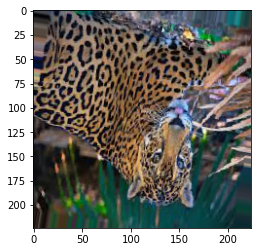

Jaguar


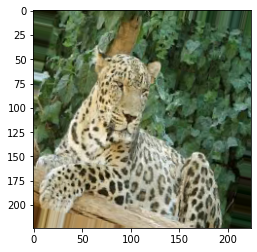

Leopard


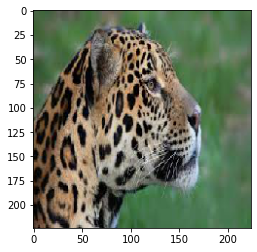

Jaguar


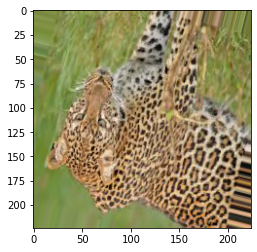

Leopard


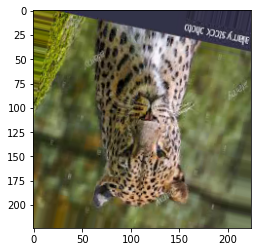

Jaguar


In [ ]:
visualize_predictoins(model, 5)

In [ ]:
model.save('leo_jag_fcl.h5')

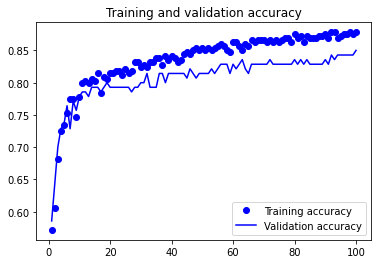

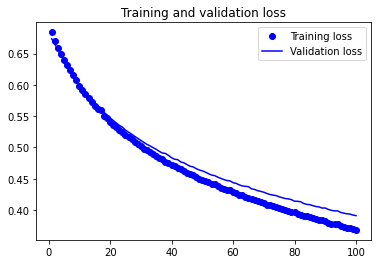

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b' , label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

In [ ]:
epochs = 100

In [ ]:
model = models.Sequential()
model.add(layers.GlobalAveragePooling2D(input_shape=(7,7,512)))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = optimizers.Adam(), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(train_features, train_labels,
                    epochs = epochs,
                    batch_size = batch_size,
                    validation_data = (validation_features, validation_labels))

Epoch 1/100
10/10 [==============================] - 0s 19ms/step - loss: 0.7060 - acc: 0.4906 - val_loss: 0.6844 - val_acc: 0.5286
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6833 - acc: 0.5562 - val_loss: 0.6753 - val_acc: 0.5857
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6719 - acc: 0.5969 - val_loss: 0.6658 - val_acc: 0.6071
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6629 - acc: 0.6062 - val_loss: 0.6573 - val_acc: 0.6214
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6524 - acc: 0.6625 - val_loss: 0.6481 - val_acc: 0.7214
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6433 - acc: 0.7219 - val_loss: 0.6397 - val_acc: 0.7429
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6373 - acc: 0.7344 - val_loss: 0.6318 - val_acc: 0.7500
Epoch 8/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6262 - 

In [ ]:
model.save('leo_jag_gap.h5')

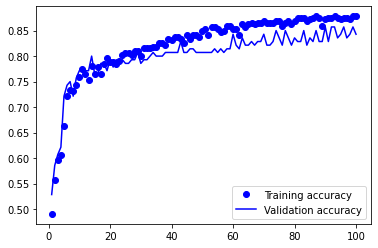

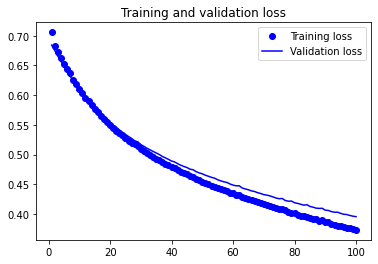

In [ ]:
import matplotlib.pyplot as plt

acc= history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

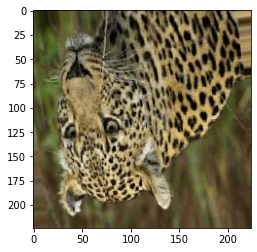

Jaguar


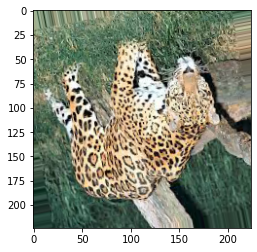

Leopard


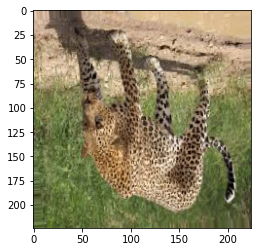

Leopard


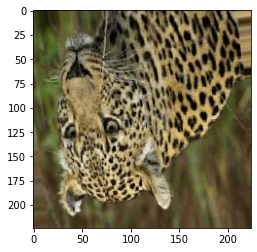

Jaguar


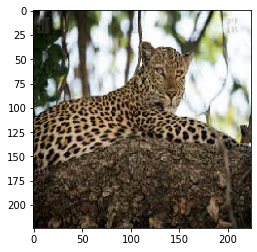

Leopard


In [ ]:
visualize_predictoins(model, 5)